# Performs Exploratory Data Analysis on Toxic Comment dataset

##### Dataset: <a href='https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data'>Toxic Comment</a>

### Table of Contents
<ul>
    <li><a href="#start">Let's get started</a></li>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#asses">Asses</a></li>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#comment">Explore Comments</a></li>
</ul>

<a id='start'></a>
### Let's get started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

<a id='gather'></a>
### Gather

In [2]:
df = pd.read_csv(os.path.join('data', 'train.csv'))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<a id="asses"></a>
## Asses

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

<a id='clean'></a>
### Clean

No cleaning steps needed.

<a id='comment'></a>
### Explore Comments

<AxesSubplot: >

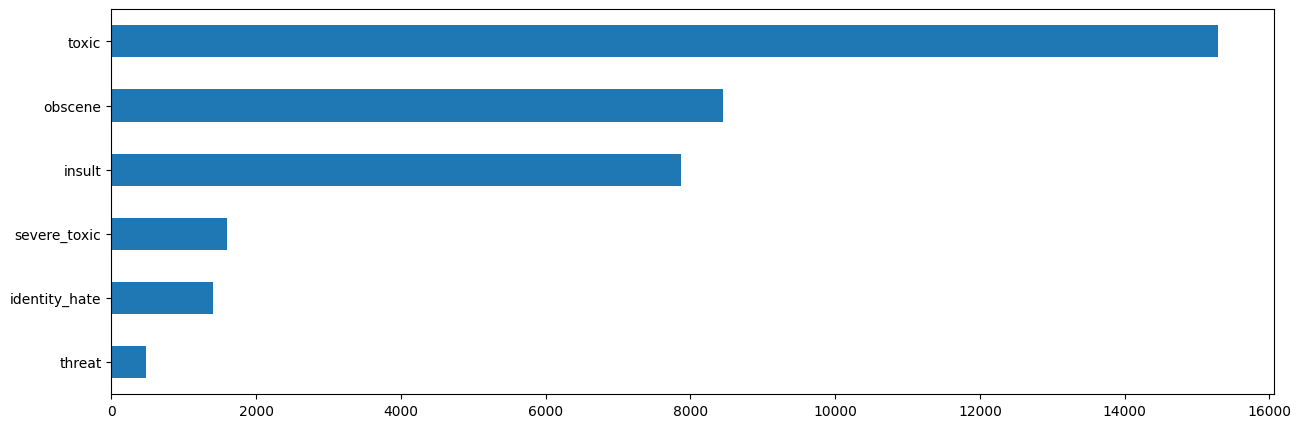

In [5]:
df[df.columns[2:]].sum().sort_values().plot(kind='barh', figsize=(15, 5))

<AxesSubplot: >

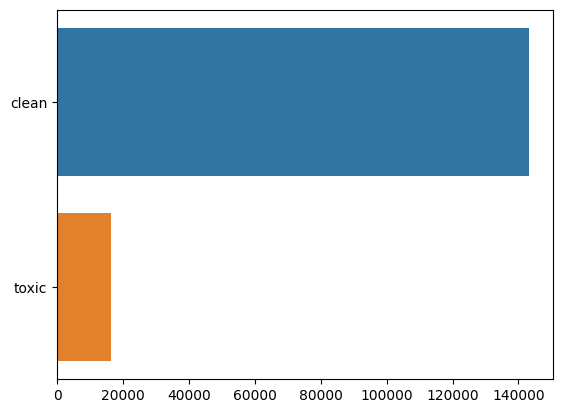

In [6]:
sns.barplot(x=[df[df[df.columns[2:]].sum(axis=1) == 0].shape[0], df[df[df.columns[2:]].sum(axis=1) > 0].shape[0]], y=['clean', 'toxic'])

In [2]:
test = pd.read_csv(os.path.join('data', 'test.csv'))
print(test.shape)
test.head()

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [3]:
test_labels = pd.read_csv(os.path.join('data', 'test_labels.csv'))
print(test_labels.shape)
test_labels.head()

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [4]:
test = test.merge(test_labels, on='id').drop('id', axis=1)
print(test.shape)
test.head()

(153164, 7)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [5]:
test.to_csv(os.path.join('data', 'labeled_test.csv'), index=False)